In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

In [2]:
outcomes = pd.read_csv('data/london-outcomes.csv')

In [3]:
police = pd.read_csv('data/london-stop-and-search.csv')

C:\Users\Toluwalase\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
street = pd.read_csv('data/london-street.csv')

In [5]:
crime = pd.read_csv('data/london_crime_by_lsoa.csv')

In [6]:
police.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,False
1,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
2,Person search,2015-03-02T18:45:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,True,True
3,Person search,2015-03-02T19:15:00+00:00,NaN,NaN,NaN,NaN,Male,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
4,Person and Vehicle search,2015-03-03T15:50:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,True


In [67]:
police['Type'].value_counts(dropna=False)

Person search                226691
Person and Vehicle search     72290
Vehicle search                 3642
Name: Type, dtype: int64

In [68]:
police['Object of search'].value_counts(dropna=False)

Controlled drugs                       134843
NaN                                     86467
Articles for use in criminal damage     77222
Firearms                                 2136
Stolen goods                              968
Anything to threaten or harm anyone       588
Article for use in theft                  287
Offensive weapons                         107
Evidence of offences under the Act          3
Fireworks                                   2
Name: Object of search, dtype: int64

In [71]:
police.dropna(subset=['Object of search'], how='all', inplace = True)

In [72]:
police['Object of search'].value_counts(dropna=False)

Controlled drugs                       134843
Articles for use in criminal damage     77222
Firearms                                 2136
Stolen goods                              968
Anything to threaten or harm anyone       588
Article for use in theft                  287
Offensive weapons                         107
Evidence of offences under the Act          3
Fireworks                                   2
Name: Object of search, dtype: int64

In [79]:
ps['Date'].unique()

array(['2015-03-02T16:40:00+00:00', '2015-03-02T19:15:00+00:00',
       '2015-03-03T15:50:00+00:00', ..., '2017-04-30T22:25:00+00:00',
       '2017-04-30T22:35:00+00:00', '2017-04-30T22:40:00+00:00'],
      dtype=object)

In [76]:
ps= police[['Date','Type', 'Object of search']]
ps.head()

,Date,Type,Object of search
0,2015-03-02T16:40:00+00:00,Person search,Stolen goods
1,2015-03-02T16:40:00+00:00,Person search,Stolen goods
3,2015-03-02T19:15:00+00:00,Person search,Stolen goods
4,2015-03-03T15:50:00+00:00,Person and Vehicle search,Stolen goods
5,2015-03-03T20:20:00+00:00,Person search,Controlled drugs


In [78]:
isSearch = ps['Type'] == 'Person search'
searchType = ps[isSearch]
searchType.head()

,Date,Type,Object of search
0,2015-03-02T16:40:00+00:00,Person search,Stolen goods
1,2015-03-02T16:40:00+00:00,Person search,Stolen goods
3,2015-03-02T19:15:00+00:00,Person search,Stolen goods
5,2015-03-03T20:20:00+00:00,Person search,Controlled drugs
7,2015-03-04T15:50:00+00:00,Person search,Article for use in theft


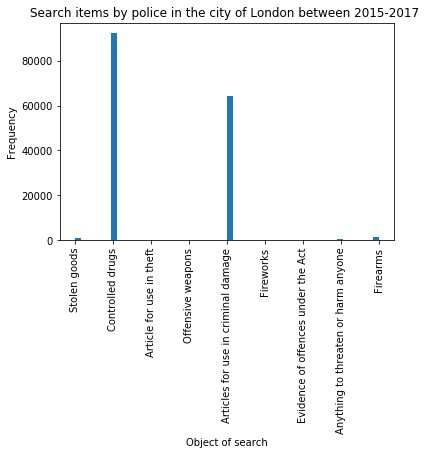

In [80]:
x = searchType['Object of search'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Object of search")
plt.title("Person search items by police in the city of London between 2015-2017 ")
plt.xticks(rotation='vertical')
plt.show()

In [81]:
isSearchPV = ps['Type'] == 'Person and Vehicle search'
searchTypePV = ps[isSearchPV]
searchTypePV.head()

,Date,Type,Object of search
4,2015-03-03T15:50:00+00:00,Person and Vehicle search,Stolen goods
6,2015-03-03T20:28:00+00:00,Person and Vehicle search,Controlled drugs
11,2015-03-05T13:35:00+00:00,Person and Vehicle search,Controlled drugs
12,2015-03-05T15:00:00+00:00,Person and Vehicle search,Controlled drugs
14,2015-03-06T15:30:00+00:00,Person and Vehicle search,Stolen goods


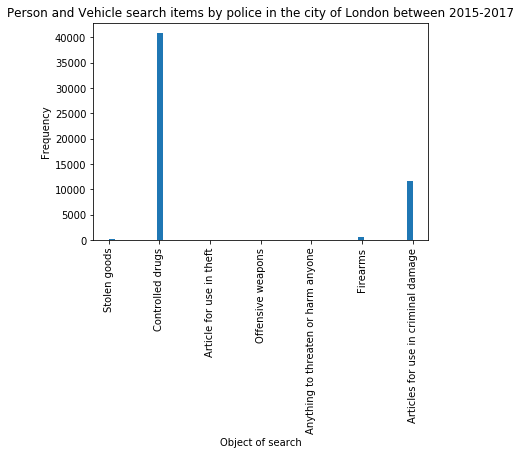

In [82]:
x = searchTypePV['Object of search'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Object of search")
plt.title("Person and Vehicle search items by police in the city of London between 2015-2017")
plt.xticks(rotation='vertical')
plt.show()

In [83]:
isSearchV = ps['Type'] == 'Vehicle search'
searchTypeV = ps[isSearchV]
searchTypeV.head()

,Date,Type,Object of search
2668,2017-01-27T00:30:00+00:00,Vehicle search,Anything to threaten or harm anyone
2683,2017-02-03T17:17:00+00:00,Vehicle search,Stolen goods
2860,2017-03-24T09:47:00+00:00,Vehicle search,Anything to threaten or harm anyone
89347,2015-11-01T00:02:00+00:00,Vehicle search,Articles for use in criminal damage
89611,2015-11-01T22:40:00+00:00,Vehicle search,Articles for use in criminal damage


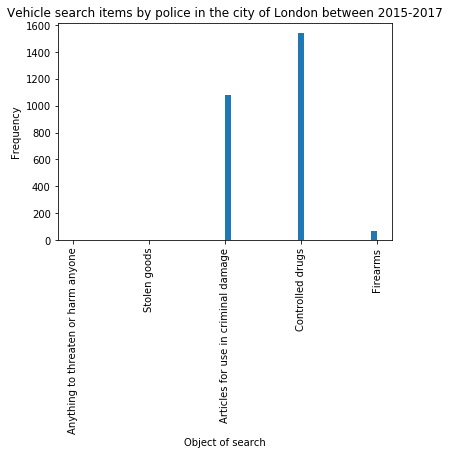

In [84]:
x = searchTypeV['Object of search'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Object of search")
plt.title("Vehicle search items by police in the city of London between 2015-2017")
plt.xticks(rotation='vertical')
plt.show()

In [69]:
police['Outcome'].value_counts(dropna=False)

Nothing found - no further action               207963
Suspect arrested                                 59130
Offender given drugs possession warning          25518
Offender given penalty notice                     5441
Local resolution                                  2285
Suspect summonsed to court                        1889
Offender cautioned                                 340
Article found - Detailed outcome unavailable        57
Name: Outcome, dtype: int64

In [70]:
police['Outcome linked to object of search'].value_counts(dropna=False)

NaN      301417
True        911
False       295
Name: Outcome linked to object of search, dtype: int64

In [7]:
outcomes.head()
outcomes.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
1947045,5186054ab0668f142d7cb79aec8376626c352d9c8db932...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.242173,51.446627,On or near IBSLEY GARDENS,E01004570,Wandsworth 023B,Suspect charged
1947046,34f05f2da82bb45753654fba55266fee64ed6deac58168...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.156772,51.442455,On or near HUNTER CLOSE,E01004545,Wandsworth 027B,Suspect charged
1947047,d53d0b9f8c8f4a75ef153a89d9b5e54a9a26ab99e82f8b...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.150844,51.474510,On or near RAWSON STREET,E01004563,Wandsworth 002C,Suspect charged
1947048,23cac61d3b0500a733a220664555305f337ac90a053993...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.174952,51.467217,On or near LAVENDER ROAD,E01004535,Wandsworth 007A,Investigation complete; no suspect identified
1947049,95b8f2a05ba8577a632ea3fb9a58b37eb3ea985678b215...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.191829,51.447830,On or near LYDDEN GROVE,E01004493,Wandsworth 019A,Investigation complete; no suspect identified


In [8]:
street.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,324a40f7da5f81b2f6c96bc6fe3e300173782e3342f409...,2014-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Investigation complete; no suspect identified,NaN
1,62dde92ceeb12755a8a95a2829048ce4796ba3cfb3f7c0...,2014-06,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences,Unable to prosecute suspect,NaN
2,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
3,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
4,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN


In [9]:
crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [10]:
outcomes.drop(['Crime ID', 'Longitude', 'Latitude', 'LSOA code', 'LSOA name'], axis=1, inplace=True)

In [29]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947050 entries, 0 to 1947049
Data columns (total 5 columns):
Month           object
Reported by     object
Falls within    object
Location        object
Outcome type    object
dtypes: object(5)
memory usage: 74.3+ MB


In [12]:
police.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [13]:
police.columns

Index(['Type', 'Date', 'Part of a policing operation', 'Policing operation',
       'Gender', 'Age range', 'Self-defined ethnicity',
       'Officer-defined ethnicity', 'Legislation', 'Object of search',
       'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing'],
      dtype='object')

In [14]:
street.drop(['Crime ID', 'Longitude', 'Latitude', 'LSOA code', 'LSOA name', 'Context'], axis=1, inplace=True)
street.columns

Index(['Month', 'Reported by', 'Falls within', 'Location', 'Crime type',
       'Last outcome category'],
      dtype='object')

In [30]:
street['Month'].unique()

array(['2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11',
       '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05',
       '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11',
       '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
       '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
       '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05'],
      dtype=object)

In [33]:
street['Month'].value_counts(dropna=False)

2016-07    94148
2017-05    91528
2016-08    90636
2017-03    89820
2016-10    88518
2014-07    88429
2016-05    87373
2015-07    87267
2016-06    86261
2016-09    85545
2015-10    84966
2014-10    84067
2015-06    84047
2017-04    83003
2014-06    82920
2016-12    82763
2016-11    82179
2015-11    82169
2015-08    81843
2014-09    81124
2015-05    80902
2014-08    80283
2014-11    80016
2017-01    79099
2015-03    78858
2015-12    78520
2016-04    77651
2015-09    77443
2016-03    77349
2017-02    76125
2015-04    75654
2016-01    75107
2014-12    74500
2016-02    73585
2015-01    73469
2015-02    69312
Name: Month, dtype: int64

In [34]:
street['Location'].value_counts(dropna=False)

On or near Supermarket                            114770
On or near Parking Area                            73814
On or near Shopping Area                           71489
On or near Petrol Station                          66311
On or near Nightclub                               39125
No Location                                        34678
On or near Sports/Recreation Area                  33053
On or near Pedestrian Subway                       26997
On or near Further/Higher Educational Building     23630
On or near Theatre/Concert Hall                    19736
On or near Police Station                          19583
On or near Hospital                                16615
On or near Conference/Exhibition Centre             9054
On or near High Street                              8948
On or near Bus/Coach Station                        6667
On or near Meridian Square                          6106
On or near Park/Open Space                          5435
On or near High Road           

In [31]:
street['Location'].unique()

array(['On or near Stone Buildings', 'On or near Pedestrian Subway',
       'On or near Carthusian Street', ..., 'On or near Sorrel Lane',
       'On or near Pilmer Court', 'On or near Foxes Walk'], dtype=object)

In [35]:
street['Last outcome category'].value_counts(dropna=False)

Investigation complete; no suspect identified          1084406
NaN                                                     708264
Status update unavailable                               625938
Under investigation                                     166240
Offender given a caution                                 63439
Court result unavailable                                 49821
Offender given a drugs possession warning                39297
Defendant found not guilty                               28398
Awaiting court outcome                                   27954
Offender sent to prison                                  27832
Offender given community sentence                        23629
Local resolution                                         20771
Offender fined                                           19857
Offender given penalty notice                            18884
Offender given suspended prison sentence                 13368
Offender given conditional discharge                   

In [25]:
street['Crime type'].value_counts(dropna=False)

Anti-social behaviour           708264
Violence and sexual offences    596107
Other theft                     333817
Vehicle crime                   262309
Burglary                        213125
Criminal damage and arson       184772
Shoplifting                     135780
Public order                    130653
Theft from the person           109168
Drugs                           106836
Robbery                          68920
Bicycle theft                    54649
Other crime                      29208
Possession of weapons            12871
Name: Crime type, dtype: int64

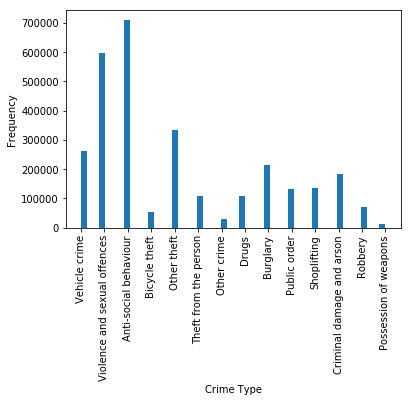

In [15]:
x = street['Crime type'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crime Type")
plt.title("Crimes with the presence City of London Police")
plt.xticks(rotation='vertical')
plt.show()

In [17]:
crime['major_category'].value_counts(dropna=False)

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

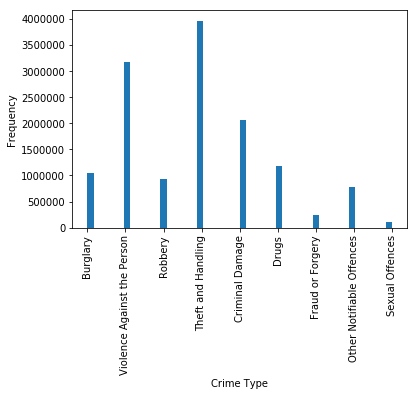

In [18]:
x = crime['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crime Type")
plt.title("Different major crimes in Borough, London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [28]:
crime['minor_category'].value_counts(dropna=False)

Other Theft                               522180
Theft From Motor Vehicle                  522180
Common Assault                            522180
Harassment                                522072
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

In [19]:
crime['borough'].value_counts(dropna=False)

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [24]:
crime['month'].value_counts(dropna=False)

12    1124217
11    1124217
10    1124217
9     1124217
8     1124217
7     1124217
6     1124217
5     1124217
4     1124217
3     1124217
2     1124217
1     1124217
Name: month, dtype: int64

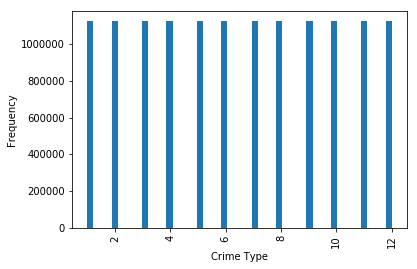

In [23]:
x = crime['month'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Month")
plt.xticks(rotation='vertical')
plt.show()

In [22]:
crime.drop(['lsoa_code', 'value'], axis=1, inplace=True)
crime.columns

Index(['borough', 'major_category', 'minor_category', 'year', 'month'], dtype='object')

In [19]:
crime['year'].unique()

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009], dtype=int64)

In [26]:
crime['year'].value_counts()

2016    1498956
2015    1498956
2014    1498956
2013    1498956
2012    1498956
2011    1498956
2010    1498956
2009    1498956
2008    1498956
Name: year, dtype: int64

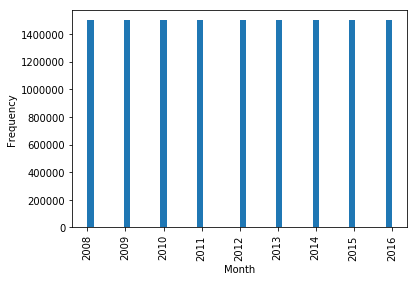

In [27]:
x = crime['year'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Month")
plt.xticks(rotation='vertical')
plt.show()

In [21]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 5 columns):
borough           object
major_category    object
minor_category    object
year              int64
month             int64
dtypes: int64(2), object(3)
memory usage: 514.6+ MB


In [61]:
isCrime08 = crime['year']==2008

In [62]:
crime08 = crime[isCrime08]

In [24]:
crime08.head()

,borough,major_category,minor_category,year,month
4,Wandsworth,Robbery,Personal Property,2008,6
33,Havering,Violence Against the Person,Harassment,2008,1
34,Hillingdon,Violence Against the Person,Offensive Weapon,2008,10
46,Westminster,Criminal Damage,Other Criminal Damage,2008,11
54,Bexley,Theft and Handling,Theft/Taking Of Motor Vehicle,2008,5


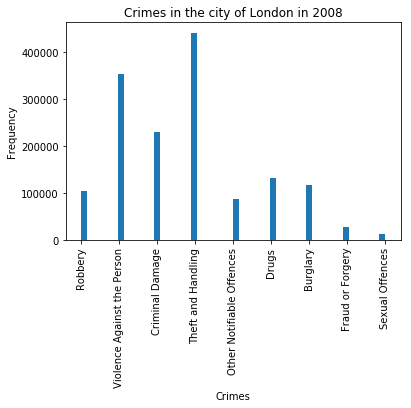

In [63]:
x = crime08['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("Crimes in the city of London in 2008")
plt.xticks(rotation='vertical')
plt.show()

In [65]:
crime08['major_category'].value_counts()

Theft and Handling             440700
Violence Against the Person    352416
Criminal Damage                229908
Drugs                          131052
Burglary                       115956
Robbery                        104376
Other Notifiable Offences       86256
Fraud or Forgery                26280
Sexual Offences                 12012
Name: major_category, dtype: int64

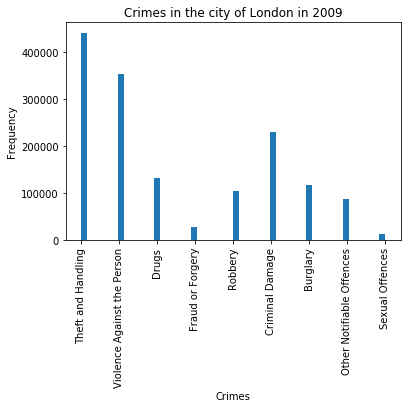

In [66]:
x = crime09['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("Crimes in the city of London in 2009")
plt.xticks(rotation='vertical')
plt.show()

In [36]:
isCrimeJan = crime['month'] == 1
crimeJan = crime[isCrimeJan]
crimeJan.head()

,borough,major_category,minor_category,year,month
12,Richmond upon Thames,Robbery,Personal Property,2014,1
24,Ealing,Theft and Handling,Other Theft Person,2012,1
33,Havering,Violence Against the Person,Harassment,2008,1
35,Brent,Theft and Handling,Theft From Shops,2010,1
60,Hounslow,Other Notifiable Offences,Going Equipped,2008,1


In [37]:
crimeJan['major_category'].value_counts()

Theft and Handling             330525
Violence Against the Person    264312
Criminal Damage                172431
Drugs                           98289
Burglary                        86967
Robbery                         78282
Other Notifiable Offences       64692
Fraud or Forgery                19710
Sexual Offences                  9009
Name: major_category, dtype: int64

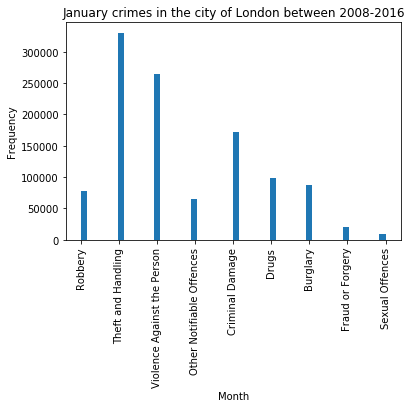

In [38]:
x = crimeJan['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("January crimes in the city of London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [64]:
isCrime09 = crime['year'] == 2009
crime09 = crime[isCrime09]
crime09['major_category'].value_counts()

Theft and Handling             440700
Violence Against the Person    352416
Criminal Damage                229908
Drugs                          131052
Burglary                       115956
Robbery                        104376
Other Notifiable Offences       86256
Fraud or Forgery                26280
Sexual Offences                 12012
Name: major_category, dtype: int64

In [39]:
isCrimeFeb = crime['month'] == 2
crimeFeb = crime[isCrimeFeb]
crimeFeb['major_category'].value_counts()

Theft and Handling             330525
Violence Against the Person    264312
Criminal Damage                172431
Drugs                           98289
Burglary                        86967
Robbery                         78282
Other Notifiable Offences       64692
Fraud or Forgery                19710
Sexual Offences                  9009
Name: major_category, dtype: int64

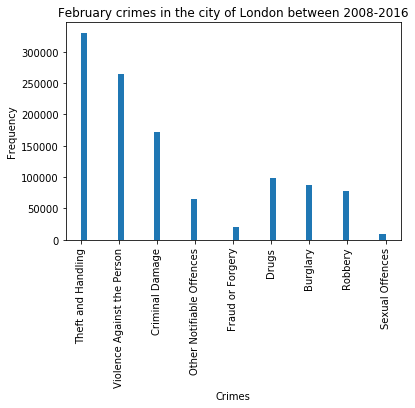

In [40]:
x = crimeFeb['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("February crimes in the city of London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [41]:
isCrimeMar = crime['month'] == 3
crimeMar = crime[isCrimeMar]
crimeMar['major_category'].value_counts()

Theft and Handling             330525
Violence Against the Person    264312
Criminal Damage                172431
Drugs                           98289
Burglary                        86967
Robbery                         78282
Other Notifiable Offences       64692
Fraud or Forgery                19710
Sexual Offences                  9009
Name: major_category, dtype: int64

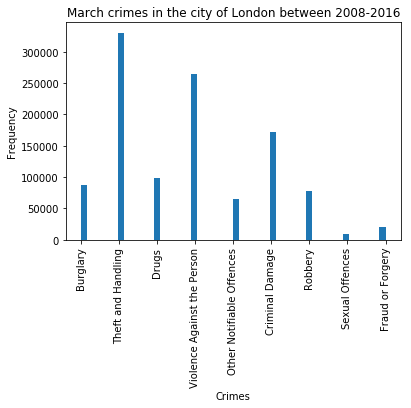

In [42]:
x = crimeMar['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("March crimes in the city of London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [43]:
isCrimeApr = crime['month'] == 4
crimeApr = crime[isCrimeApr]
crimeApr['major_category'].value_counts()

Theft and Handling             330525
Violence Against the Person    264312
Criminal Damage                172431
Drugs                           98289
Burglary                        86967
Robbery                         78282
Other Notifiable Offences       64692
Fraud or Forgery                19710
Sexual Offences                  9009
Name: major_category, dtype: int64

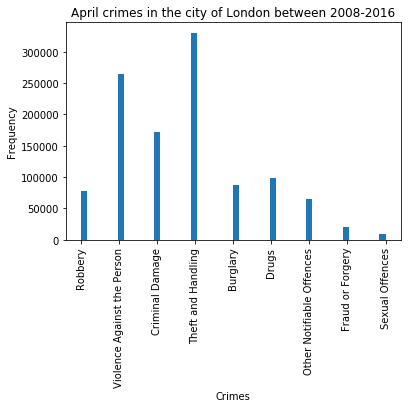

In [44]:
x = crimeApr['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("April crimes in the city of London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [45]:
isCrimeMay = crime['month'] == 5
crimeMay = crime[isCrimeMay]
crimeMay['major_category'].value_counts()

Theft and Handling             330525
Violence Against the Person    264312
Criminal Damage                172431
Drugs                           98289
Burglary                        86967
Robbery                         78282
Other Notifiable Offences       64692
Fraud or Forgery                19710
Sexual Offences                  9009
Name: major_category, dtype: int64

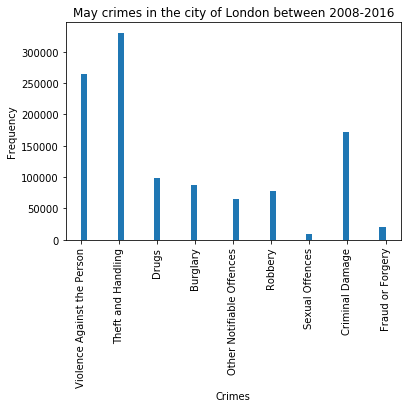

In [46]:
x = crimeMay['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("May crimes in the city of London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [47]:
isCrimeJun = crime['month'] == 6
crimeJun = crime[isCrimeJun]
crimeJun['major_category'].value_counts()

Theft and Handling             330525
Violence Against the Person    264312
Criminal Damage                172431
Drugs                           98289
Burglary                        86967
Robbery                         78282
Other Notifiable Offences       64692
Fraud or Forgery                19710
Sexual Offences                  9009
Name: major_category, dtype: int64

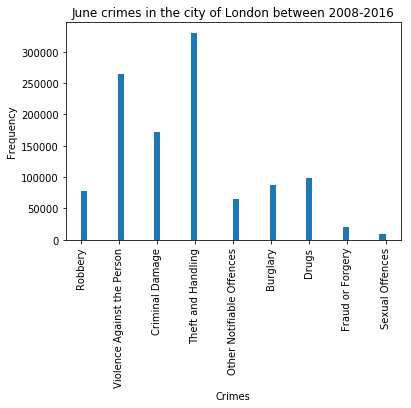

In [48]:
x = crimeJun['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("June crimes in the city of London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [49]:
isCrimeJul = crime['month'] == 7
crimeJul = crime[isCrimeJul]
crimeJul['major_category'].value_counts()

Theft and Handling             330525
Violence Against the Person    264312
Criminal Damage                172431
Drugs                           98289
Burglary                        86967
Robbery                         78282
Other Notifiable Offences       64692
Fraud or Forgery                19710
Sexual Offences                  9009
Name: major_category, dtype: int64

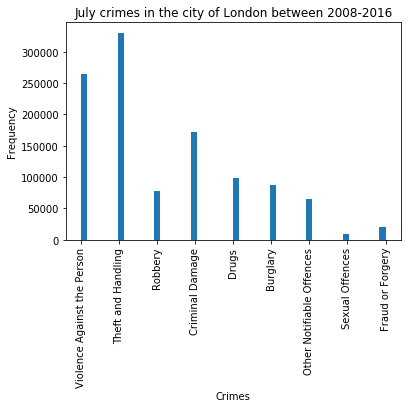

In [50]:
x = crimeJul['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("July crimes in the city of London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [51]:
isCrimeAug = crime['month'] == 8
crimeAug = crime[isCrimeAug]
crimeAug['major_category'].value_counts()

Theft and Handling             330525
Violence Against the Person    264312
Criminal Damage                172431
Drugs                           98289
Burglary                        86967
Robbery                         78282
Other Notifiable Offences       64692
Fraud or Forgery                19710
Sexual Offences                  9009
Name: major_category, dtype: int64

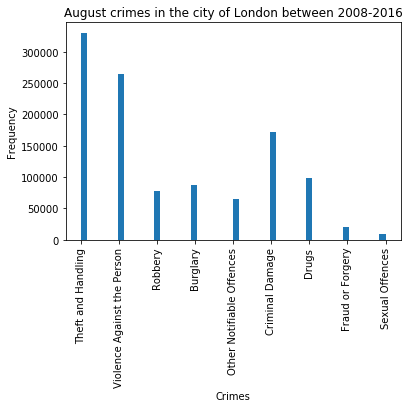

In [52]:
x = crimeAug['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("August crimes in the city of London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [53]:
isCrimeSep = crime['month'] == 9
crimeSep = crime[isCrimeSep]
crimeSep['major_category'].value_counts()

Theft and Handling             330525
Violence Against the Person    264312
Criminal Damage                172431
Drugs                           98289
Burglary                        86967
Robbery                         78282
Other Notifiable Offences       64692
Fraud or Forgery                19710
Sexual Offences                  9009
Name: major_category, dtype: int64

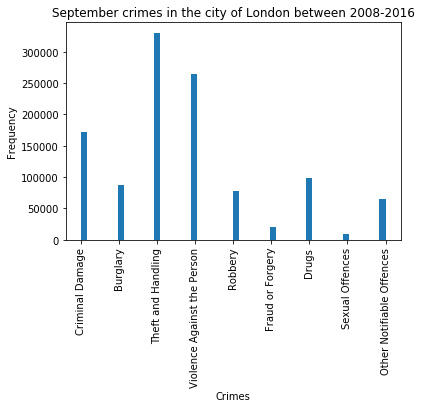

In [54]:
x = crimeSep['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("September crimes in the city of London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [55]:
isCrimeOct = crime['month'] == 10
crimeOct = crime[isCrimeOct]
crimeOct['major_category'].value_counts()

Theft and Handling             330525
Violence Against the Person    264312
Criminal Damage                172431
Drugs                           98289
Burglary                        86967
Robbery                         78282
Other Notifiable Offences       64692
Fraud or Forgery                19710
Sexual Offences                  9009
Name: major_category, dtype: int64

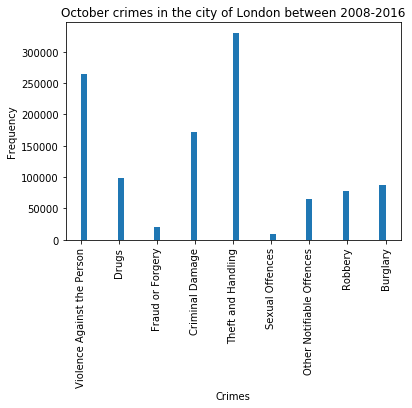

In [56]:
x = crimeOct['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("October crimes in the city of London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [57]:
isCrimeNov = crime['month'] == 11
crimeNov = crime[isCrimeNov]
crimeNov['major_category'].value_counts()

Theft and Handling             330525
Violence Against the Person    264312
Criminal Damage                172431
Drugs                           98289
Burglary                        86967
Robbery                         78282
Other Notifiable Offences       64692
Fraud or Forgery                19710
Sexual Offences                  9009
Name: major_category, dtype: int64

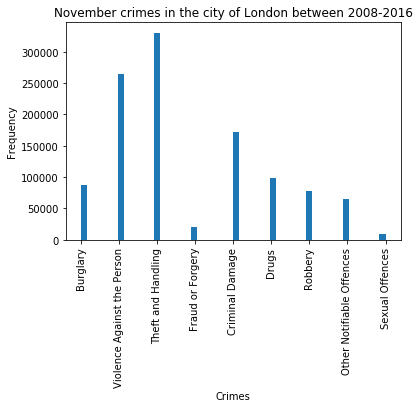

In [58]:
x = crimeNov['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("November crimes in the city of London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [59]:
isCrimeDec = crime['month'] == 12
crimeDec = crime[isCrimeDec]
crimeDec['major_category'].value_counts()

Theft and Handling             330525
Violence Against the Person    264312
Criminal Damage                172431
Drugs                           98289
Burglary                        86967
Robbery                         78282
Other Notifiable Offences       64692
Fraud or Forgery                19710
Sexual Offences                  9009
Name: major_category, dtype: int64

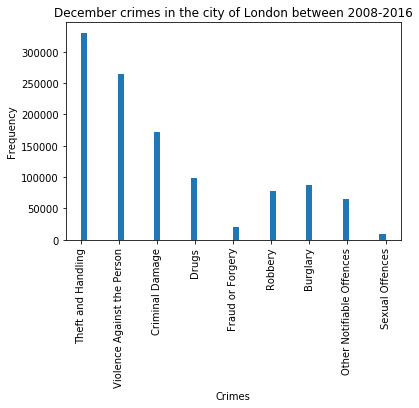

In [60]:
x = crimeDec['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crimes")
plt.title("December crimes in the city of London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()